### Importar as Bibliotecas

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Carregar os dados

In [2]:
visits = pd.read_csv('/datasets/visits_log_us.csv')

In [3]:
orders = pd.read_csv('/datasets/orders_log_us.csv')

In [4]:
costs = pd.read_csv('/datasets/costs_us.csv')

### Analisar preliminarmente os dados

In [5]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


# Legenda (Visits):
Uid — identificador unívoco do usuário
Device — dispositivo do usuário
Start Ts — data e hora do início da sessão
End Ts — data e hora do final da sessão
Source Id — identificador da origem do anúncio através do qual o usuário chegou

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


# Legenda (Orders): 
Uid — identificador unívoco do usuário que faz um pedido
Buy Ts — data e hora do pedido
Revenue — a receita da Y.Afisha com o pedido

In [7]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


# Legenda (Costs): 
source_id — identificador da origem de anúncio
dt — data
costs — despesas com esta origem de anúncio neste dia

### Obter amostras dos dados

In [8]:
visits.head(10)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451
7,touch,2017-11-05 15:15:00,3,2017-11-05 15:14:00,11423865690854540312
8,desktop,2017-07-19 10:44:00,3,2017-07-19 10:41:00,2987360259350925644
9,desktop,2017-11-08 13:43:00,5,2017-11-08 13:42:00,1289240080042562063


In [9]:
orders.head(10)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
5,2017-06-01 08:43:00,0.18,10402394430196413321
6,2017-06-01 08:54:00,1.83,12464626743129688638
7,2017-06-01 09:22:00,1.22,3644482766749211722
8,2017-06-01 09:22:00,3.30,17542070709969841479
9,2017-06-01 09:23:00,0.37,1074355127080856382


In [10]:
costs.head(10)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
5,1,2017-06-06,40.39
6,1,2017-06-07,40.59
7,1,2017-06-08,56.63
8,1,2017-06-09,40.16
9,1,2017-06-10,43.24


### Análise e conversão dos dados

visits_data["start_timestamp"] = pd.to_datetime(visits_data["start_timestamp"])
visits_data["end_timestamp"] = pd.to_datetime(visits_data["end_timestamp"])
orders_data["timestamp"] = pd.to_datetime(orders_data["timestamp"])
costs_data["date"] = pd.to_datetime(costs_data["date"])

In [14]:
visits['Start Ts'] = pd.to_datetime(visits['Start Ts'])
visits['End Ts'] = pd.to_datetime(visits['End Ts'])
orders['Buy Ts'] = pd.to_datetime(orders['Buy Ts'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [15]:
visits.dtypes

Device               object
End Ts       datetime64[ns]
Source Id             int64
Start Ts     datetime64[ns]
Uid                  uint64
dtype: object

In [16]:
orders.dtypes

Buy Ts     datetime64[ns]
Revenue           float64
Uid                uint64
dtype: object

In [17]:
costs.dtypes

source_id             int64
dt           datetime64[ns]
costs               float64
dtype: object

<AxesSubplot:xlabel='Month'>

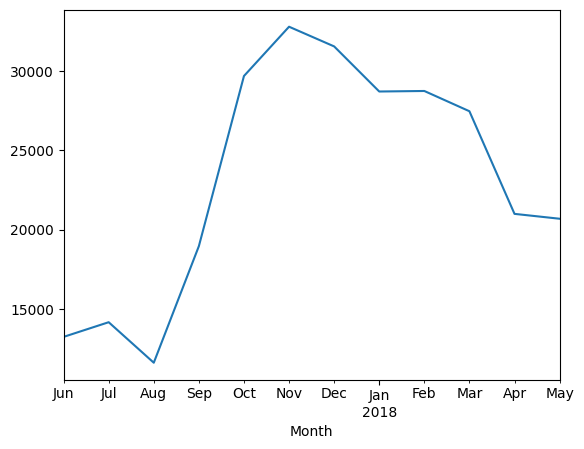

In [18]:
visits['Month'] = visits['Start Ts'].dt.to_period('M')
visits_users_period = visits.groupby('Month')['Uid'].nunique()
visits_users_period.plot()

In [59]:
user_source = visits.groupby("Uid")['Source Id'].first().reset_index()

In [66]:
# a quantidade de visitas começou a decrescer mensalmente a partir de Novembro de 2017. Houve uma pequeno aumento no final do ano, o que pode ter sido estimulado pela época das festividades.

<AxesSubplot:xlabel='Month'>

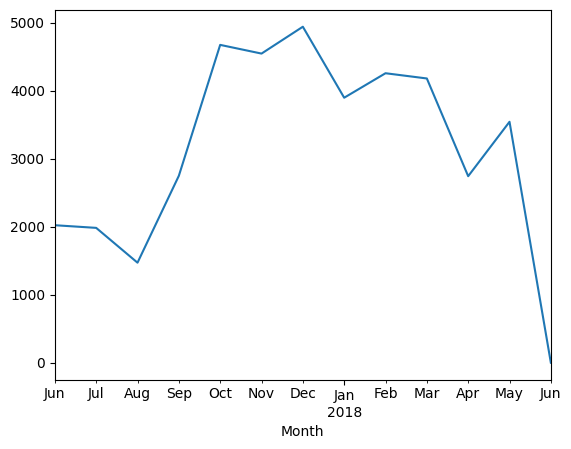

In [19]:
orders['Month'] = orders['Buy Ts'].dt.to_period('M')
orders_by_period = orders.groupby('Month')['Uid'].nunique()
orders_by_period.plot()

In [63]:
orders['month'] = orders['Buy Ts'].dt.to_period("M")
orders_monthly = orders.groupby(['Uid', 'Month'])['Revenue'].sum().reset_index()

In [68]:
# como consequencia da queda das visitas a partir de Novembro de 2017, os pedidos também começaram a cair no mesmo período.

<AxesSubplot:xlabel='Month'>

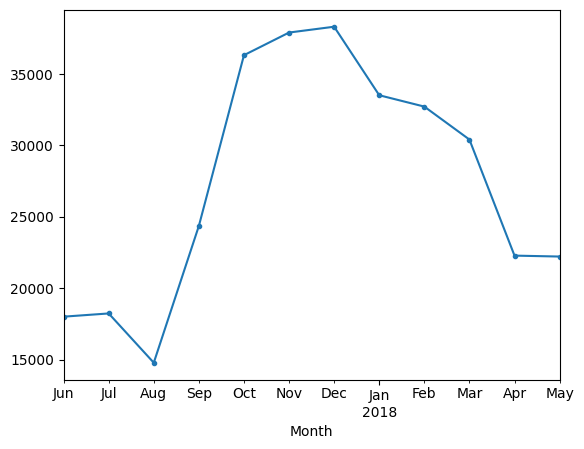

In [20]:
costs['Month'] = costs['dt'].dt.to_period('M')
costs_by_period = costs.groupby('Month')['costs'].sum()
costs_by_period.plot(kind='line', label='costs', marker='.')

In [165]:
costs['first_month'] = costs['dt'].dt.to_period("M")
costs_months = costs.groupby(['source_id', 'first_month'])['costs'].sum().reset_index().rename(columns = {'source_id' : 'Source Id'})

In [70]:
# os custos também sofreram queda a partir do final de 2017

### Métricas

6.1 Retenção

In [66]:
first_visits = visits.groupby('Uid')['Month'].min().reset_index(name='first_life_month_by_customer')
first_visits.head()

,Uid,first_life_month_by_customer
0,11863502262781,2018-03
1,49537067089222,2018-02
2,297729379853735,2017-06
3,313578113262317,2017-09
4,325320750514679,2017-09


In [67]:
cohort_visits = pd.merge(visits, first_visits, on='Uid')
cohort_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,Month,first_life_month_by_customer
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12,2017-12
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02,2018-02
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07,2017-07
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05,2018-03
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03,2018-03


In [68]:
cohort_visits['diff'] = cohort_visits['Month'].astype('int64') - cohort_visits['first_life_month_by_customer'].astype('int64')
cohort_visits.head()

,Device,End Ts,Source Id,Start Ts,Uid,Month,first_life_month_by_customer,diff
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12,2017-12,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02,2018-02,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07,2017-07,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05,2018-03,2
4,desktop,2018-03-09 20:33:00,4,2018-03-09 20:05:00,16174680259334210214,2018-03,2018-03,0


In [69]:
cohort_visits.pivot_table(index='first_life_month_by_customer', columns='diff', values='Uid', aggfunc='nunique').fillna('')

diff,0,1,2,3,4,5,6,7,8,9,10,11
first_life_month_by_customer,,,,,,,,,,,,
2017-06,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0,
2017-08,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0,,
2017-09,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0,,,
2017-10,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0,,,,
2017-11,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0,,,,,
2017-12,25268.0,1410.0,960.0,786.0,512.0,481.0,,,,,,
2018-01,22624.0,1351.0,890.0,565.0,458.0,,,,,,,
2018-02,22197.0,1267.0,565.0,446.0,,,,,,,,


In [75]:
# é possível perceber pela tabela acima que a retenção dos clientes tem diminúido ao compararmos o primeiro ciclo do cliente (first_life_month_by_customer) e quando houve o retorno dos mesmos nos meses subsequentes (diff), considerando os dados até maio de 2018.

In [204]:
first_orders = orders.groupby('Uid')['Month'].min().reset_index(name='first_month')

In [205]:
cohort = pd.merge(orders_monthly, user_source, on='Uid')

In [206]:
cohort = pd.merge(cohort, first_orders, on = 'Uid')

In [134]:
cohort_orders['diff'] = cohort_orders['Month'].astype('int64') - cohort_orders['first_order_month'].astype('int64')

In [135]:
cohort_orders.pivot_table(index='first_order_month', columns='diff', values='Revenue', aggfunc='sum').fillna('')

diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,9557.49,981.82,885.34,1931.3,2068.58,1487.92,1922.74,1176.56,1119.15,1225.51,1155.66,519.62
2017-07,11557.65,644.61,1199.05,690.31,339.97,300.08,231.16,272.72,310.05,282.96,299.36,
2017-08,7228.83,646.63,628.12,536.05,676.85,388.45,288.61,554.86,400.33,257.53,,
2017-09,14568.53,2884.49,1344.52,10261.52,1033.84,1670.08,1810.85,627.57,474.92,,,
2017-10,21716.20,2325.21,830.65,682.01,657.77,522.37,368.1,501.14,,,,
2017-11,21036.26,1629.27,814.39,1326.13,604.04,219.88,469.02,,,,,
2017-12,20767.49,1141.22,4054.7,4669.1,1371.57,1481.66,,,,,,
2018-01,13949.50,994.22,1026.34,481.59,211.48,,,,,,,
2018-02,15177.16,1015.98,286.66,270.7,,,,,,,,


In [81]:
# 6.2 LTV (LifeTime Value)

In [207]:
cohort_size = cohort.groupby(['first_month', 'Source Id'])['Uid'].nunique().reset_index().rename(columns = {'Uid' : 'n_buyers'})

In [208]:
cohort = pd.merge(cohort, cohort_size, on = ['first_month', 'Source Id'])

In [209]:
cohort = pd.merge(cohort, costs_months, on = ['first_month', 'Source Id'])

In [210]:
cohort['ltv'] = cohort['Revenue'] / cohort['n_buyers']

In [175]:
print("Mean LTV is:", round(cohort_orders['Revenue'].sum() / cohort_size['n_buyers'].nunique(), 2))

Mean LTV is: 3073.87


In [215]:
report.pivot_table(index='first_order_month', columns='diff', values='ltv', aggfunc='sum').fillna('')

diff,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06,992.126990,101.919031,91.903806,200.480969,214.731488,154.455363,199.592388,122.134256,116.17474,127.215571,119.964706,53.939792
2017-07,1304.217395,72.740702,135.306214,77.897696,38.363749,33.862382,26.085138,30.774956,34.987441,31.930484,33.781134,
2017-08,1145.004460,102.422416,99.49054,84.90719,107.209088,61.528212,45.714139,87.886584,63.409934,40.791248,,
2017-09,1185.351143,234.693103,109.395273,834.916389,84.117164,135.884076,147.33766,51.061488,38.641302,,,
2017-10,1085.810000,116.2605,41.5325,34.1005,32.8885,26.1185,18.405,25.057,,,,
2017-11,1082.483362,83.838937,41.906861,68.239966,31.082676,11.31458,24.13482,,,,,
2017-12,1028.187390,56.501196,200.746042,231.164659,67.905702,73.356199,,,,,,
2018-01,897.432997,63.962567,66.028989,30.982814,13.605443,,,,,,,
2018-02,814.769477,54.541791,15.389033,14.532238,,,,,,,,


In [ ]:
# O valores significativos no início demonstram que uma maior geração de receita. No entanto, com o passar do tempo há um decréscimo dos valores. Isso pode ter ocorrido por alguma mudança de estratégia do produto ou efeito sazonal. Também pode ter ocorrido uma mudança no comportamento do cliente, que tende a diminuir as aquisições após as primeiras ocorrências.

In [ ]:
# 6.3 CAC (Customer Acquisition Cost)

In [178]:
costs.head()
print('Total costs {}'.format(costs['costs'].sum()))

Total costs 329131.62


In [180]:
costs['costs_month'] = costs['dt'].dt.to_period('M')

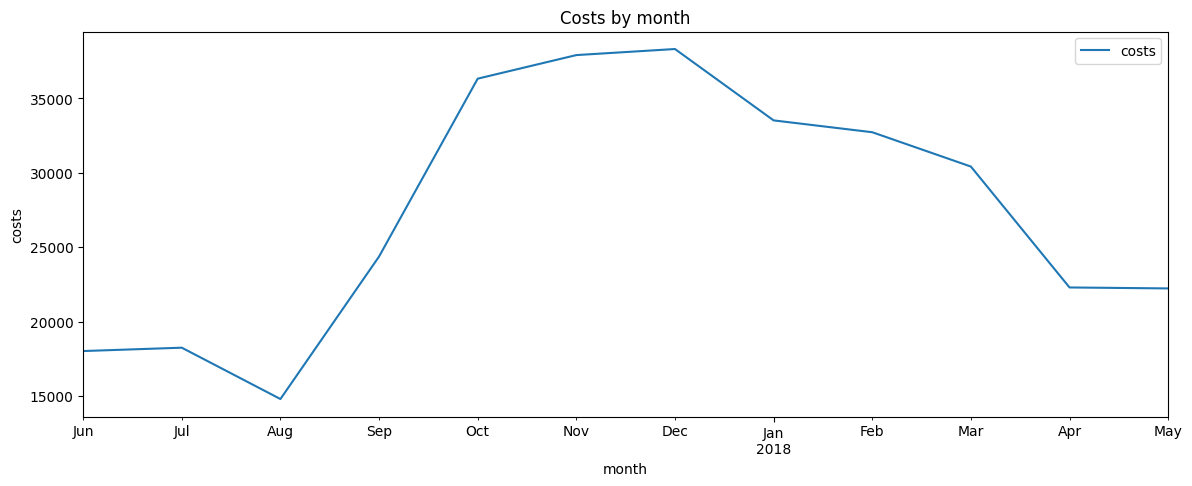

In [181]:
(costs.pivot_table(index='costs_month', values='costs', aggfunc='sum')
      .plot(figsize=(14,5), title='Costs by month', xlabel = 'month', ylabel = 'costs'))
plt.show()     

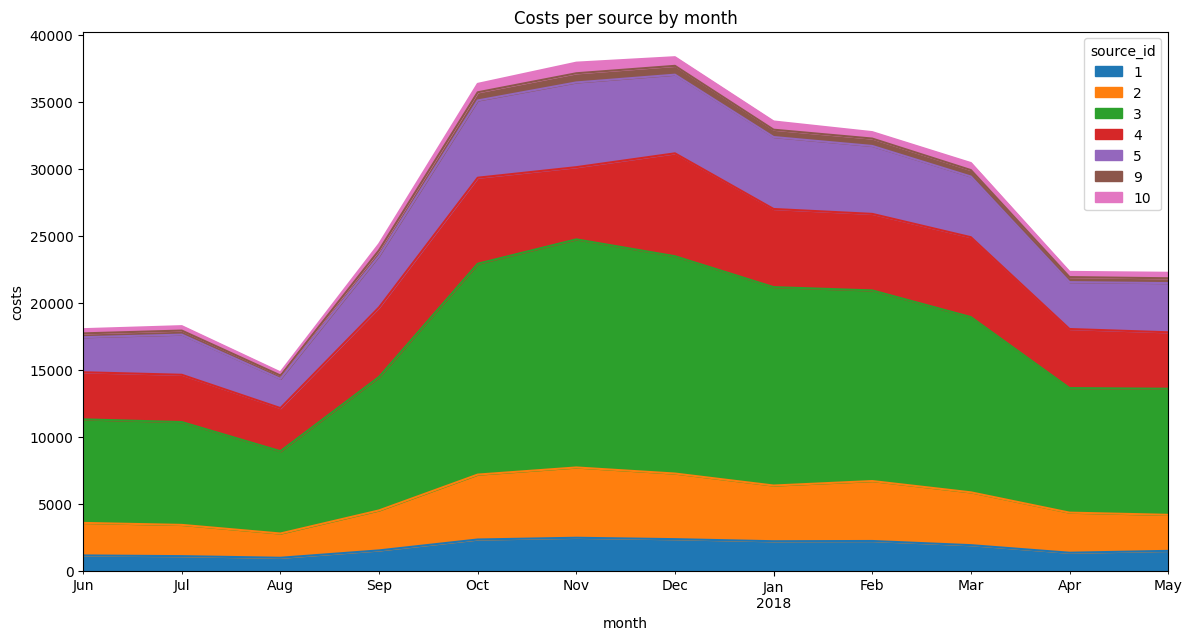

In [182]:
(costs.pivot_table(index='costs_month', columns='source_id', values='costs', aggfunc='sum')
      .plot
      .area(figsize=(14,7), title='Costs per source by month', xlabel = 'month', ylabel = 'costs'))
plt.show()

In [211]:
cohort['cac'] = cohort['costs'] / cohort['n_buyers']

In [212]:
print("Mean CAC is:", round(costs['costs'].sum() / orders['Uid'].nunique(), 2))

Mean CAC is: 9.01


In [ ]:
# Economia unitária por cliente :  média LTV = 19389.02 > média CAC = 9.01

Apesar da queda no faturamento, ainda é uma empresa saudável considerando que a média de retorno dos clientes supera o custo em sua aquisição.


In [ ]:
# 6.4 ROI (Return on Investments)

In [222]:
cohort['romi'] = cohort['ltv'] / cohort['cac']

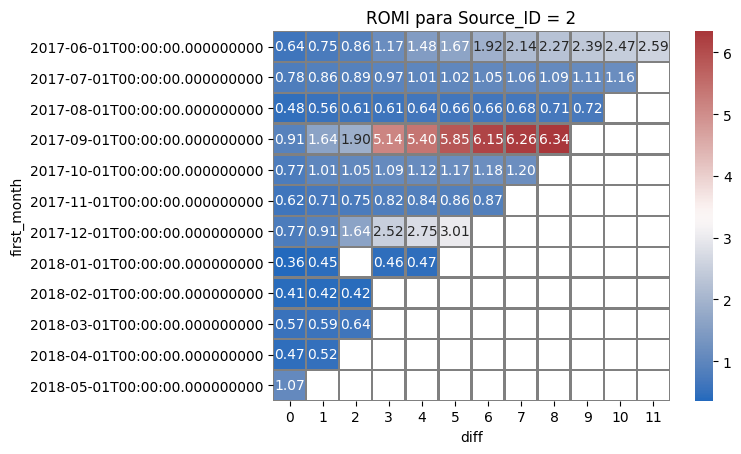

------------------------------------------------


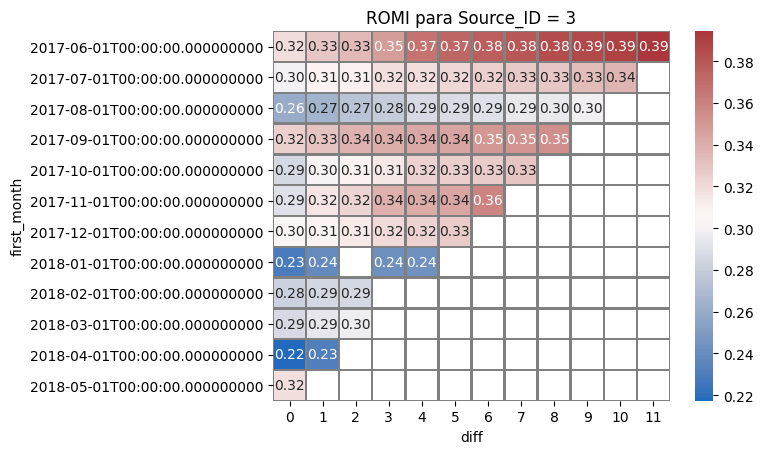

------------------------------------------------


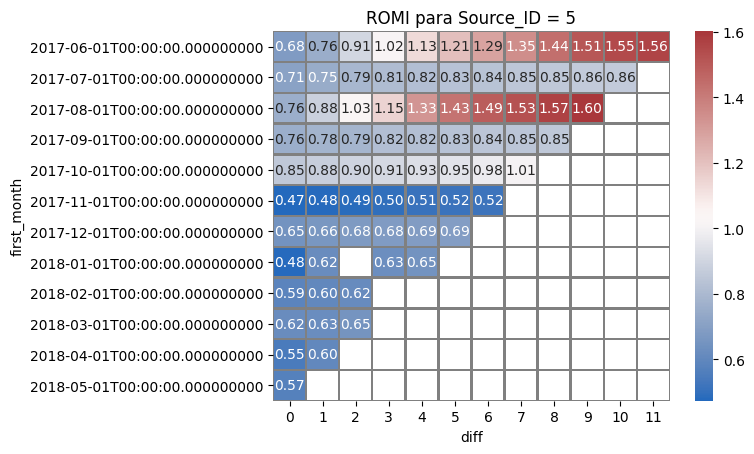

------------------------------------------------


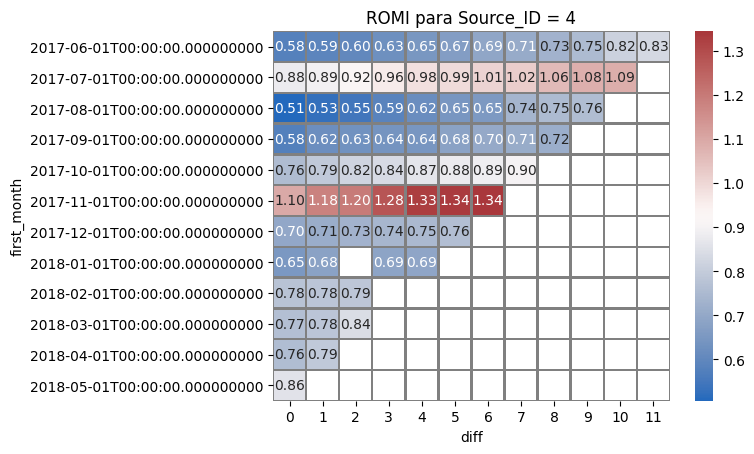

------------------------------------------------


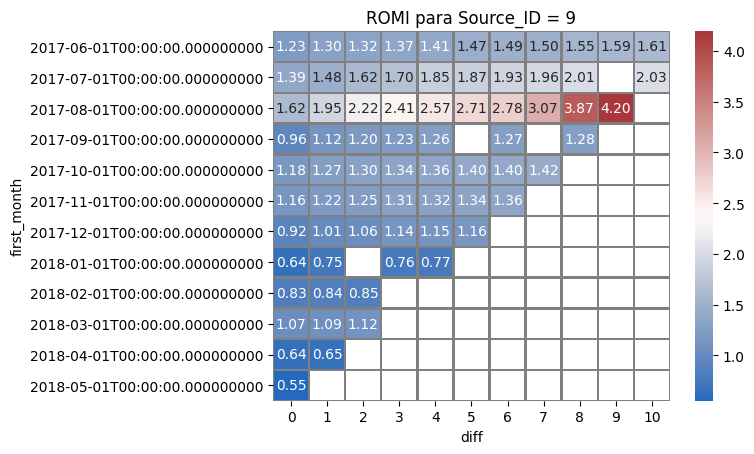

------------------------------------------------


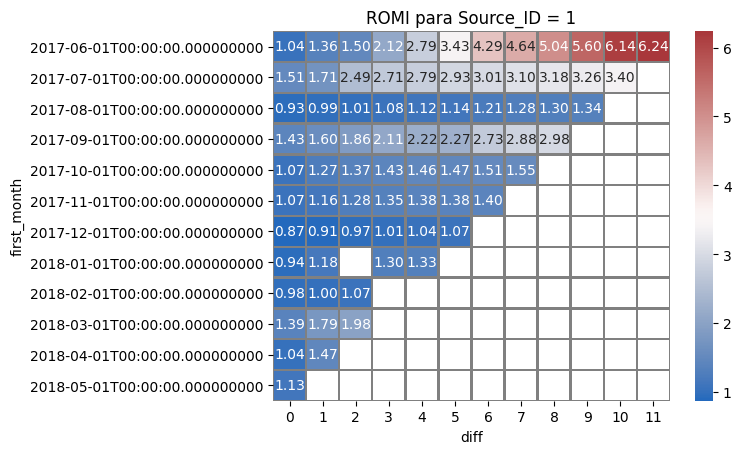

------------------------------------------------


In [230]:
for source_id in cohort['Source Id'].unique():
    if source_id == 10:
        continue
    cohort_source = cohort[cohort['Source Id'] == source_id]
    pivot = cohort_source.pivot_table(index = 'first_month', columns = 'diff', values = 'romi', aggfunc = 'sum').cumsum(axis = 1)
    sns.heatmap(pivot, annot=True, fmt='.2f', linewidths=1, linecolor='gray', cmap='vlag')
    plt.title(f"ROMI para Source_ID = {source_id}")
    plt.show()
    print("------------------------------------------------")

In [ ]:
# os resultados da ROMI demonstram que o retorno tem sido abaixo do esperado, com retornos menores que 1% por source. Portanto, os investimentos não parecem ter valido a pena.